<a href="https://colab.research.google.com/github/IbrahimNabid/Diabetas-Data-Analysis/blob/main/Diabetas_Data_Analysis_Feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd    
                                                        # Make sure pandas is loaded
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_binary_health_indicators_BRFSS2015.csv') # Note that pd.read_csv is used because we imported pandas as pd

Feature Selection. Goal: determining which features better help predict whether someone has diabetes

In [ ]:
df.info()                                     #gets info on dfset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [ ]:
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_binary_health_indicators_BRFSS2015.csv')

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
#change data to int
df["Diabetes_binary"] = df["Diabetes_binary"].astype('int')
df["HighBP"] = df["HighBP"].astype('int')
df["HighChol"] = df["HighChol"].astype('int')
df["CholCheck"] = df["CholCheck"].astype('int')
df["BMI"] = df["BMI"].astype('int')
df["Smoker"] = df["Smoker"].astype('int')
df["Stroke"] = df["Stroke"].astype('int')
df["HeartDiseaseorAttack"] = df["HeartDiseaseorAttack"].astype('int')
df["PhysActivity"] = df["PhysActivity"].astype('int')
df["Fruits"] = df["Fruits"].astype('int') 
df["Veggies"] = df["Veggies"].astype('int')
df["HvyAlcoholConsump"] = df["HvyAlcoholConsump"].astype('int')
df["AnyHealthcare"] = df["AnyHealthcare"].astype('int')
df["NoDocbcCost"] = df["NoDocbcCost"].astype('int')
df["GenHlth"] = df["GenHlth"].astype('int')
df["MentHlth"] = df["MentHlth"].astype('int')
df["PhysHlth"] = df["PhysHlth"].astype('int')
df["DiffWalk"] = df["DiffWalk"].astype('int')
df["Sex"] = df["Sex"].astype('int')
df["Age"] = df["Age"].astype('int')
df["Education"] = df["Education"].astype('int')
df["Income"] =df["Income"].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [ ]:
df.size                                       #the total number of array elements

5580960

In [ ]:
df.shape                                          #the size of each dimension   

(253680, 22)

In [ ]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [ ]:
df.describe(include = 'all')

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df.apply(pd.Series.value_counts)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,218334.0,144851.0,146089.0,9470.0,NaN,141257.0,243388.0,229787.0,61760.0,92782.0,...,12417.0,232326.0,NaN,175680.0,160052.0,211005.0,141974.0,NaN,NaN,NaN
1,35346.0,108829.0,107591.0,244210.0,NaN,112423.0,10292.0,23893.0,191920.0,160898.0,...,241263.0,21354.0,45299.0,8538.0,11388.0,42675.0,111706.0,5700.0,174.0,9811.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,89084.0,13054.0,14764.0,NaN,NaN,7598.0,4043.0,11783.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,75646.0,7381.0,8495.0,NaN,NaN,11123.0,9478.0,15994.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,31570.0,3789.0,4542.0,NaN,NaN,13823.0,62750.0,20135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for column in df.columns:
    print(column)
    print(df[column].value_counts().sort_index())
    print()

Diabetes_binary
0    218334
1     35346
Name: Diabetes_binary, dtype: int64

HighBP
0    144851
1    108829
Name: HighBP, dtype: int64

HighChol
0    146089
1    107591
Name: HighChol, dtype: int64

CholCheck
0      9470
1    244210
Name: CholCheck, dtype: int64

BMI
12      6
13     21
14     41
15    132
16    348
     ... 
91      1
92     32
95     12
96      1
98      7
Name: BMI, Length: 84, dtype: int64

Smoker
0    141257
1    112423
Name: Smoker, dtype: int64

Stroke
0    243388
1     10292
Name: Stroke, dtype: int64

HeartDiseaseorAttack
0    229787
1     23893
Name: HeartDiseaseorAttack, dtype: int64

PhysActivity
0     61760
1    191920
Name: PhysActivity, dtype: int64

Fruits
0     92782
1    160898
Name: Fruits, dtype: int64

Veggies
0     47839
1    205841
Name: Veggies, dtype: int64

HvyAlcoholConsump
0    239424
1     14256
Name: HvyAlcoholConsump, dtype: int64

AnyHealthcare
0     12417
1    241263
Name: AnyHealthcare, dtype: int64

NoDocbcCost
0    232326
1     21354

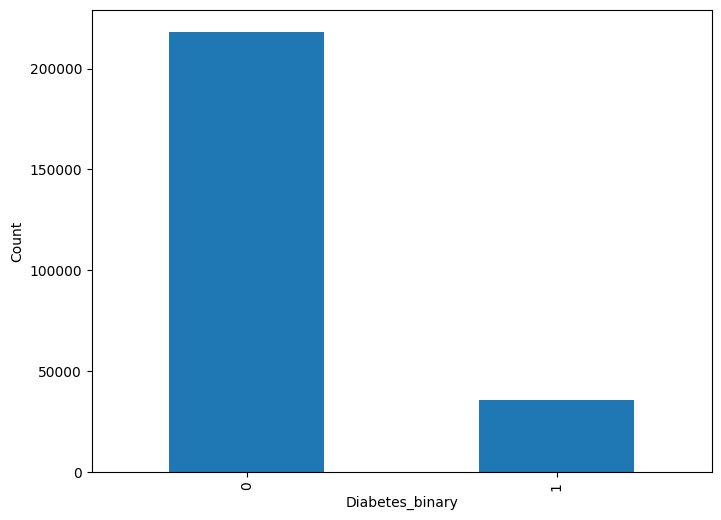

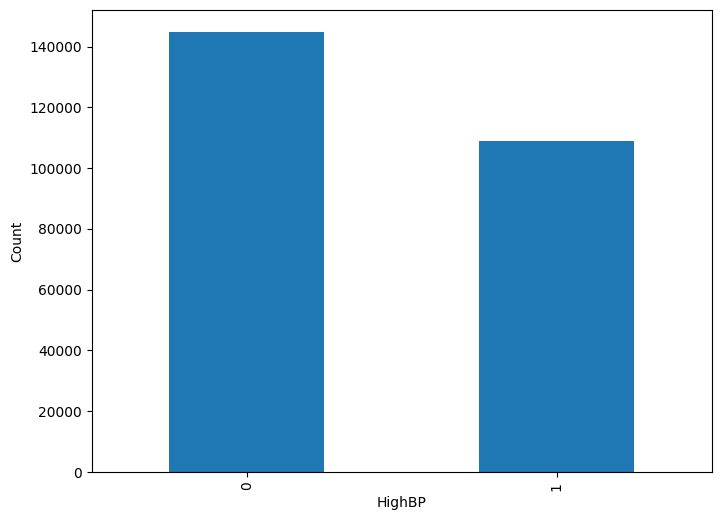

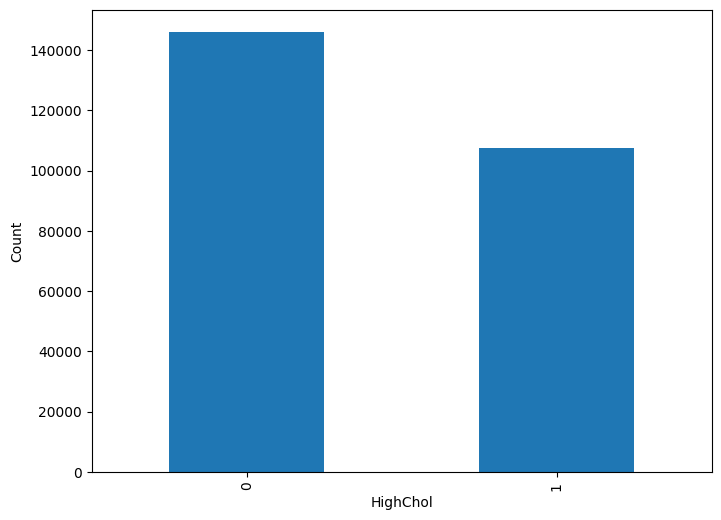

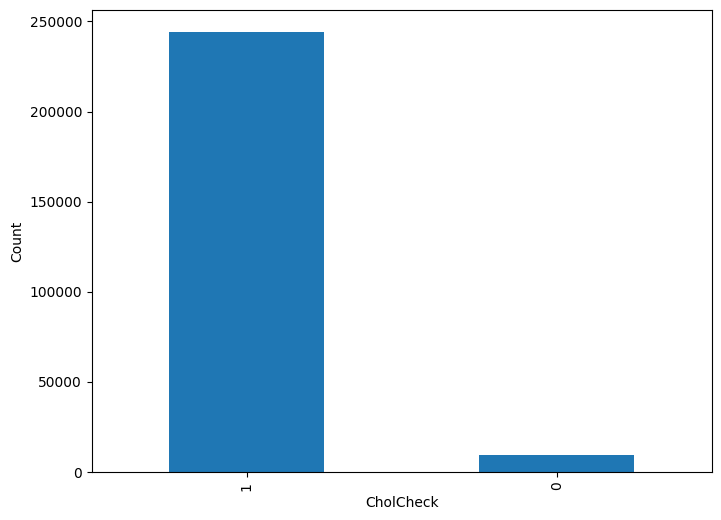

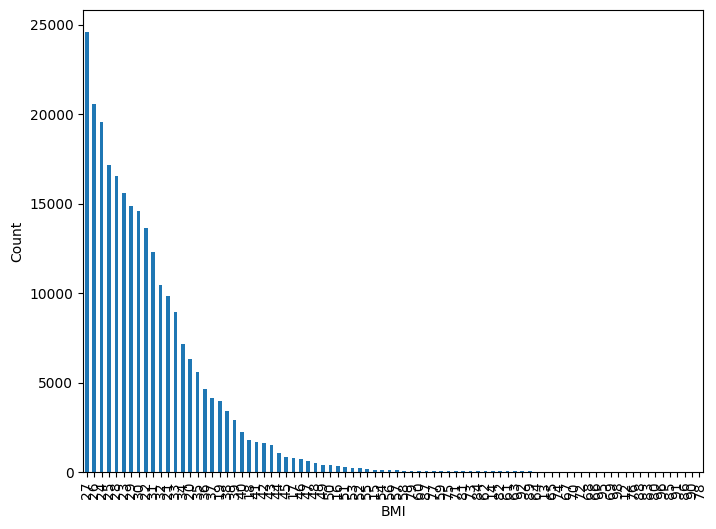

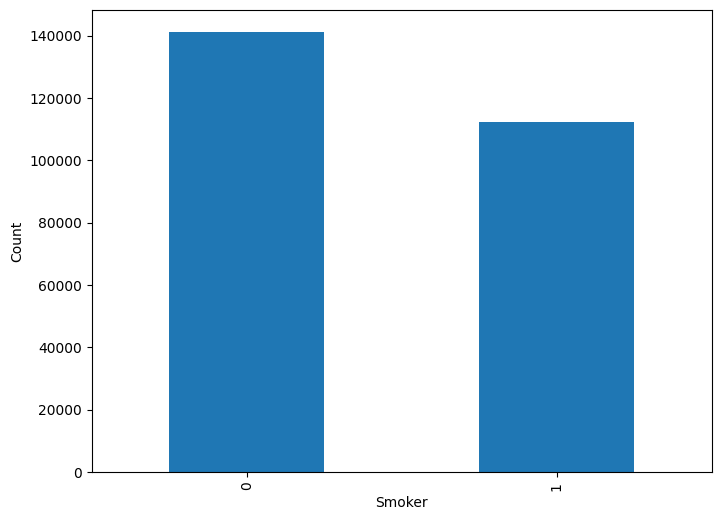

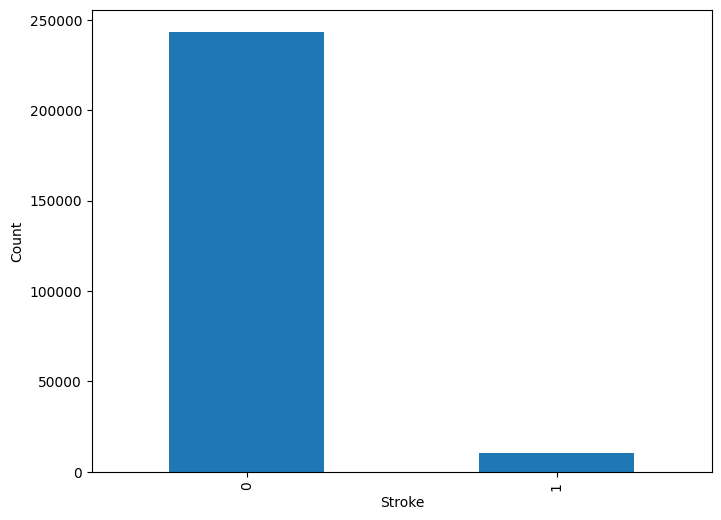

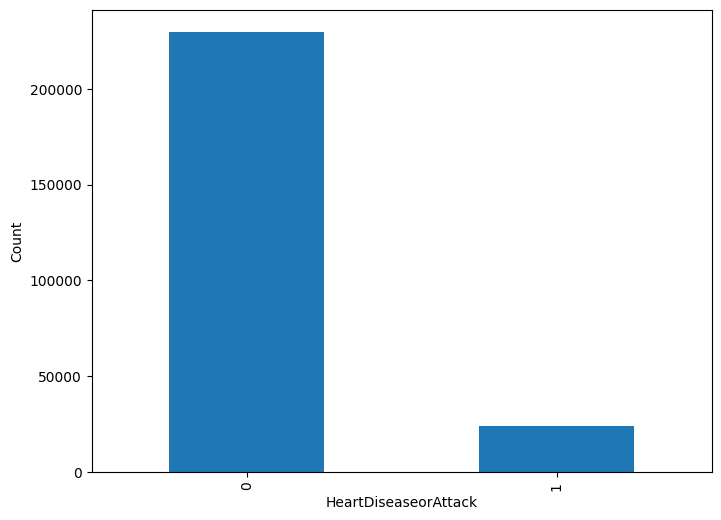

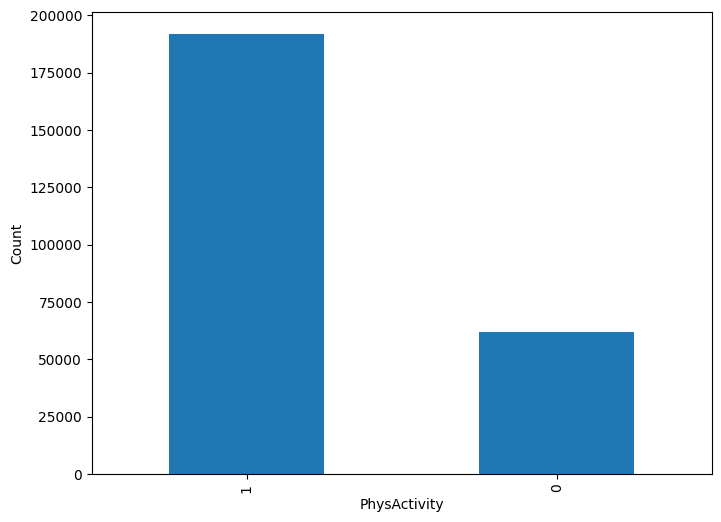

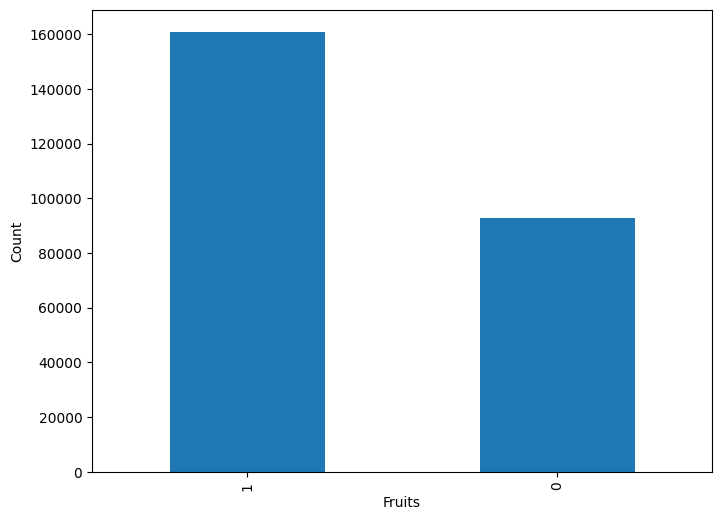

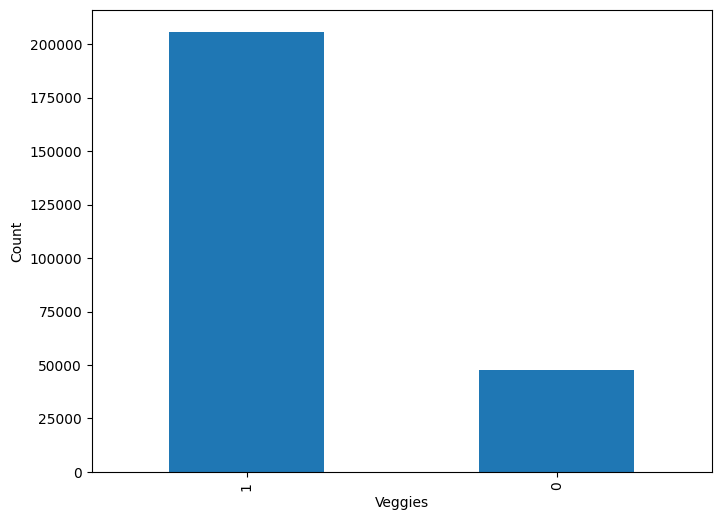

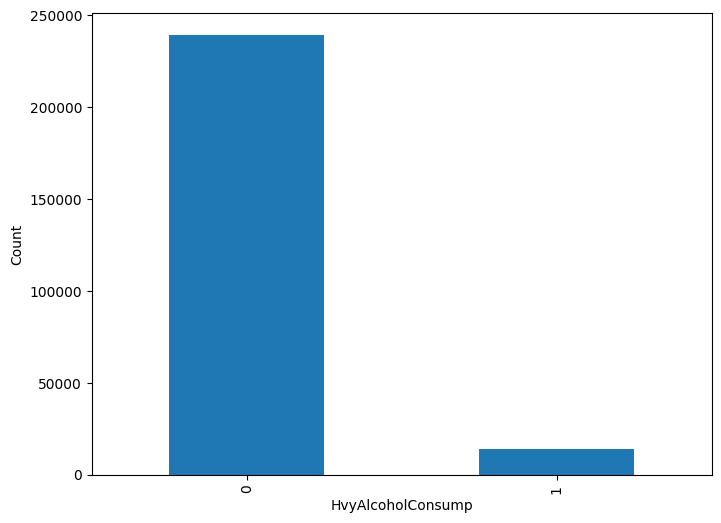

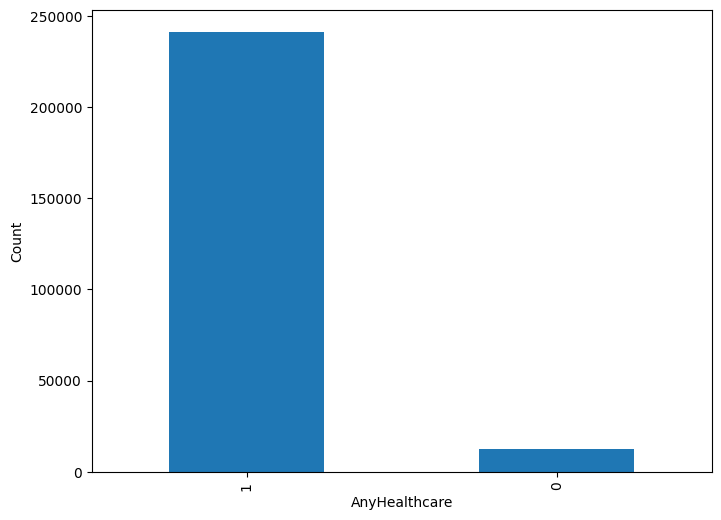

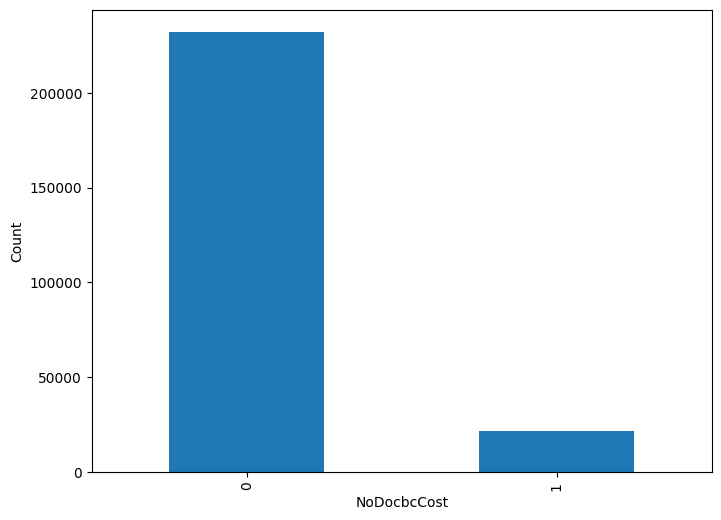

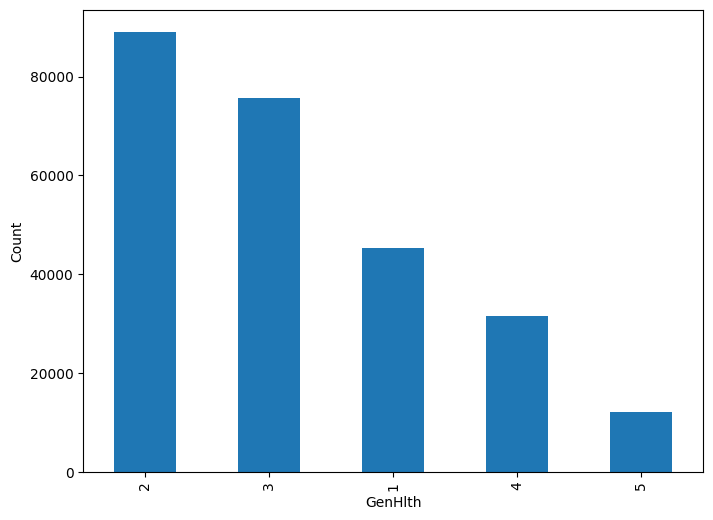

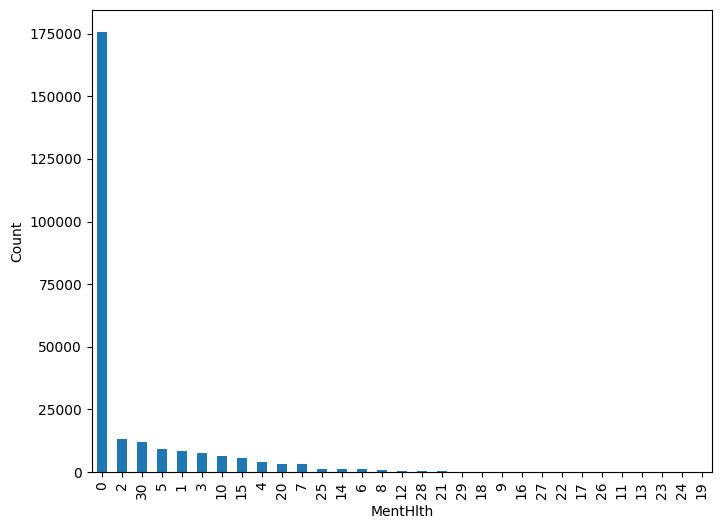

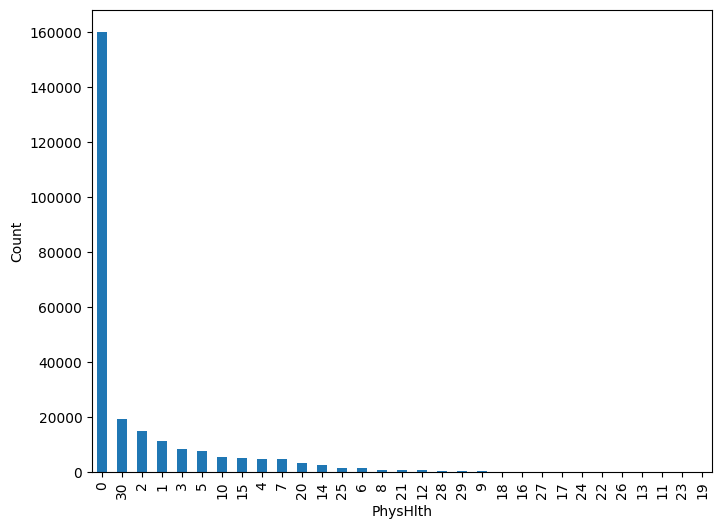

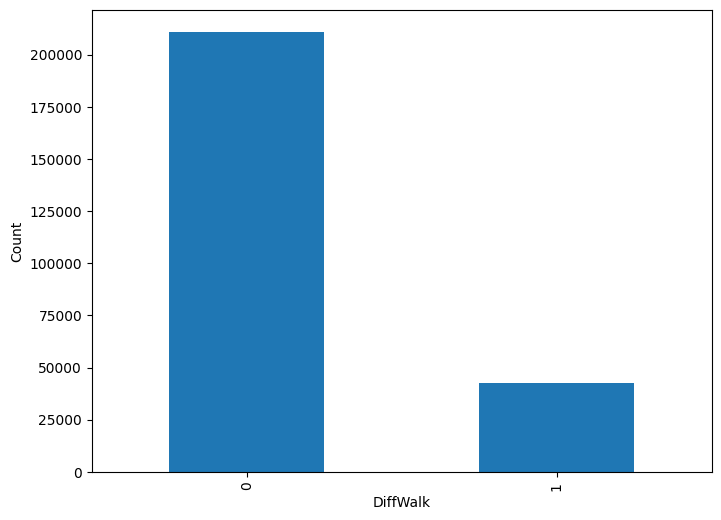

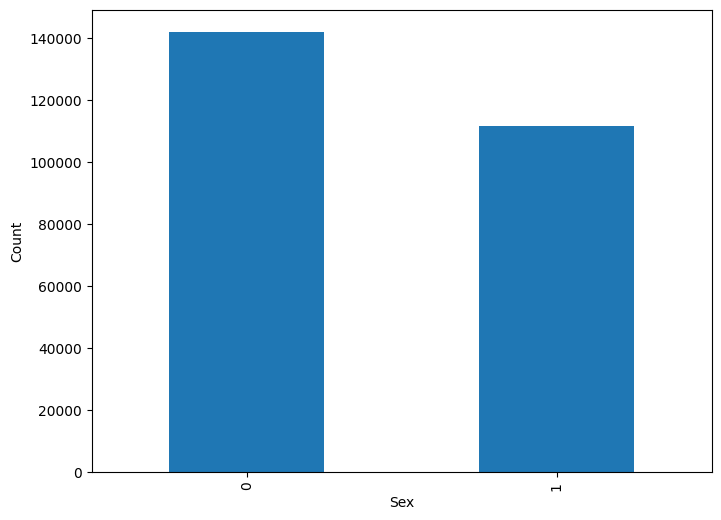

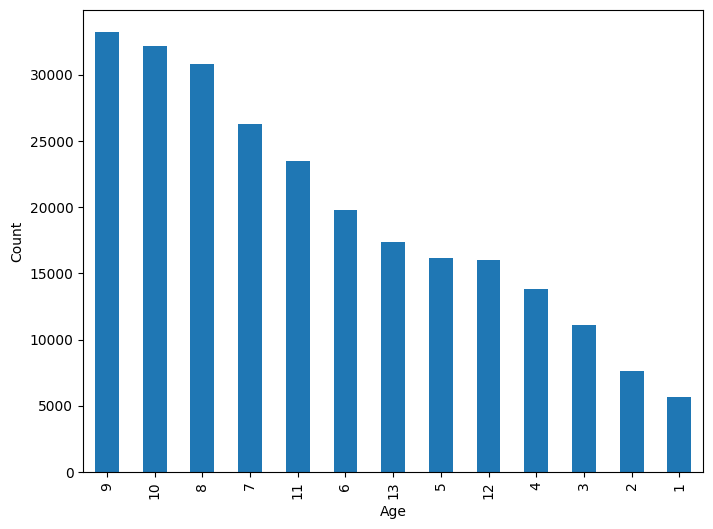

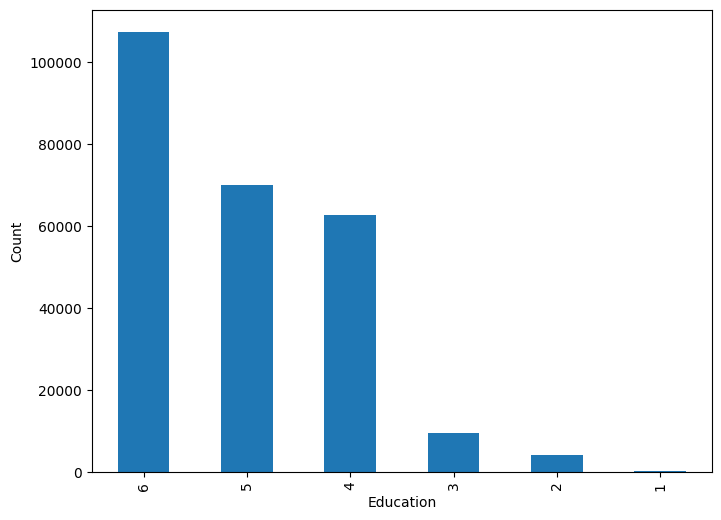

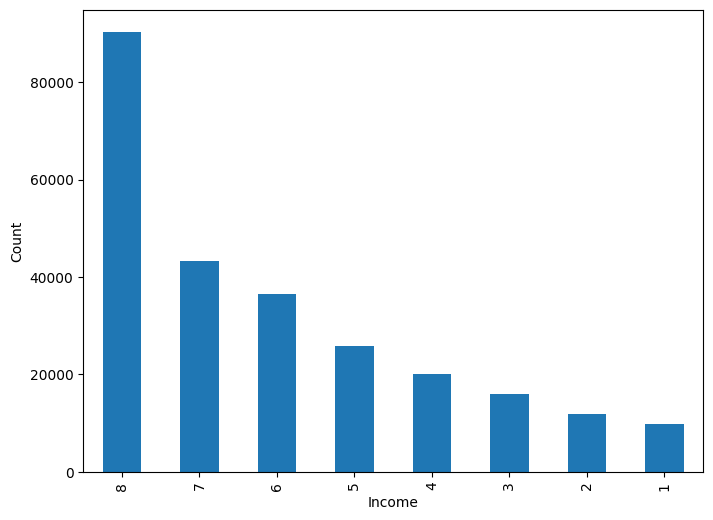

In [ ]:
for col in df.columns:
    # Get a count of the occurrences of each unique value in the column
    value_counts = df[col].value_counts()

    # Plot a bar chart for the value counts of the column
    ax = value_counts.plot(kind='bar', figsize=(8, 6))
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    plt.show()

In [ ]:
df.corr()  #check correlation 

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.263129,0.200276,0.064761,0.216843,0.060789,0.105816,0.177282,-0.118133,-0.040779,...,0.016255,0.031433,0.293569,0.069315,0.171337,0.218344,0.031430,0.177442,-0.124456,-0.163919
HighBP,0.263129,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.200276,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.064761,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.216843,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.060789,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.105816,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.177282,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.118133,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.040779,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


In [ ]:
corr_matrix = df.corr()         
print(corr_matrix['Diabetes_binary'])       #only prints corr between Diabetes_binary and rest

Diabetes_binary         1.000000
HighBP                  0.263129
HighChol                0.200276
CholCheck               0.064761
BMI                     0.216843
Smoker                  0.060789
Stroke                  0.105816
HeartDiseaseorAttack    0.177282
PhysActivity           -0.118133
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
AnyHealthcare           0.016255
NoDocbcCost             0.031433
GenHlth                 0.293569
MentHlth                0.069315
PhysHlth                0.171337
DiffWalk                0.218344
Sex                     0.031430
Age                     0.177442
Education              -0.124456
Income                 -0.163919
Name: Diabetes_binary, dtype: float64


In [7]:
abs_corr = abs(df.corr(numeric_only=False)['Diabetes_binary'])
top15_features = abs_corr.sort_values(ascending=True)[1:16].index.tolist()
print(top15_features)

['Sex', 'NoDocbcCost', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'Smoker', 'CholCheck', 'MentHlth', 'Stroke', 'PhysActivity', 'Education', 'Income', 'PhysHlth', 'HeartDiseaseorAttack', 'Age']


In [8]:
abs_corr = abs(df.corr(numeric_only=False)['Diabetes_binary'])
top15_features = abs_corr.sort_values(ascending=False)[1:16]

print("Top 15 features correlated with Diabetes_binary:")
for feature, corr in top15_features.items():
    print(f"{feature} : {corr:.3f}")

Top 15 features correlated with Diabetes_binary:
GenHlth : 0.294
HighBP : 0.263
DiffWalk : 0.218
BMI : 0.217
HighChol : 0.200
Age : 0.177
HeartDiseaseorAttack : 0.177
PhysHlth : 0.171
Income : 0.164
Education : 0.124
PhysActivity : 0.118
Stroke : 0.106
MentHlth : 0.069
CholCheck : 0.065
Smoker : 0.061


Based on outside research


HighBP: Valid 


Supporting Evidence: "The first main finding of the present study is that not only does the presence of hypertension predict future diabetes, in agreement with earlier epidemiological observations 2, 3, 8, 9, but also that the incidence of hypertension increases significantly in the presence of diabetes" (Hypertension and diabetes: co-prediction and time trajectories Research paper https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5877818/#:~:text=The%20first%20main%20finding%20of,in%20the%20presence%20of%20diabetes.)


GeneralHealth: Valid

Supporting Evidence: "Four attributes were age, body mass index, diabetes pedigree function, and plasma glucose concentration" https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9018179/#:~:text=Four%20attributes%20were%20age%2C%20body,function%2C%20and%20plasma%20glucose%20concentration.


DiffWalk: Valid

Supporting Evidence: "Chronically elevated blood sugars can also damage nerves that tell muscles how to move"Muscle weakness and balance problems are factors of diabetes. https://www.webmd.com/diabetes/peripheral-neuropathy-risk-factors-symptoms#:~:text=Chronically%20elevated%20blood%20sugars%20can,carrying%20things%20with%20your%20hands.


BMI: Valid 
Supporting Evidence: "Four attributes were age, body mass index, diabetes pedigree function, and plasma glucose concentration" https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9018179/#:~:text=Four%20attributes%20were%20age%2C%20body,function%2C%20and%20plasma%20glucose%20concentration.


HighChol: Valid 
Supporting Evidence: "As traditional lipid parameters, total cholesterol (TC), TG, HDL-C and LDL-C are the most commonly used biomarkers to predict diabetes and prediabetes" https://bmcendocrdisord.biomedcentral.com/articles/10.1186/s12902-022-00984-x#:~:text=As%20traditional%20lipid%20parameters%2C%20total,7%2C8%2C9%5D.


Age: Valid

Supporting Evidence: "Four attributes were age, body mass index, diabetes pedigree function, and plasma glucose concentration" https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9018179/#:~:text=Four%20attributes%20were%20age%2C%20body,function%2C%20and%20plasma%20glucose%20concentration.

HeartDiseaseorAttack: Valid 
Supporting Evidence: "Heart failure, a condition in which the heart fails to efficiently pump oxygenated blood through the body, also is a risk factor for diabetes." https://www.heart.org/en/news/2019/06/06/diabetes-and-heart-failure-are-linked-treatment-should-be-too#:~:text=But%20heart%20failure%2C%20a%20condition,a%20risk%20factor%20for%20diabetes.


PhysHlth: Valid
Supporting Evidence: "Four attributes were age, body mass index, diabetes pedigree function, and plasma glucose concentration" https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9018179/#:~:text=Four%20attributes%20were%20age%2C%20body,function%2C%20and%20plasma%20glucose%20concentration.


Income: Valid
Supporting Evidence: "Low income appears to be associated with a higher prevalence of diabetes and diabetes related complications" https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1618393/


Education: N/A
Supporting Evidence:





In [ ]:
# Print unique values for columns
print('Unique values in column CholCheck:', df['CholCheck'].unique())
print('Unique values in column BMI:', df['BMI'].unique())
print('Unique values in column Smoker:', df['Smoker'].unique())
print('Unique values in column Stroke:', df['Stroke'].unique())
print('Unique values in column HeartDiseaseorAttack:', df['HeartDiseaseorAttack'].unique())
print('Unique values in column PhysActivity:', df['PhysActivity'].unique())
print('Unique values in column Fruits:', df['Fruits'].unique())
print('Unique values in column Veggies:', df['Veggies'].unique())
print('Unique values in column HvyAlcoholConsump:', df['HvyAlcoholConsump'].unique())
print('Unique values in column AnyHealthcare:', df['AnyHealthcare'].unique())
print('Unique values in column NoDocbcCost:', df['NoDocbcCost'].unique())
print('Unique values in column GenHlth:', df['GenHlth'].unique())
print('Unique values in column MentHlth:', df['MentHlth'].unique())
print('Unique values in column PhysHlth:', df['PhysHlth'].unique())
print('Unique values in column DiffWalk:', df['DiffWalk'].unique())
print('Unique values in column Sex:', df['Sex'].unique())
print('Unique values in column Age:', df['Age'].unique())
print('Unique values in column Education:', df['Education'].unique())
print('Unique values in column Income:', df['Income'].unique())

Unique values in column CholCheck: [1 0]
Unique values in column BMI: [40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 45 39 19 47 18
 36 43 55 49 42 17 16 41 44 50 59 48 52 46 54 57 53 14 15 51 58 63 61 56
 74 62 64 66 73 85 60 67 65 70 82 79 92 68 72 88 96 13 81 71 75 12 77 69
 76 87 89 84 95 98 91 86 83 80 90 78]
Unique values in column Smoker: [1 0]
Unique values in column Stroke: [0 1]
Unique values in column HeartDiseaseorAttack: [0 1]
Unique values in column PhysActivity: [0 1]
Unique values in column Fruits: [0 1]
Unique values in column Veggies: [1 0]
Unique values in column HvyAlcoholConsump: [0 1]
Unique values in column AnyHealthcare: [1 0]
Unique values in column NoDocbcCost: [0 1]
Unique values in column GenHlth: [5 3 2 4 1]
Unique values in column MentHlth: [18  0 30  3  5 15 10  6 20  2 25  1  4  7  8 21 14 26 29 16 28 11 12 24
 17 13 27 19 22  9 23]
Unique values in column PhysHlth: [15  0 30  2 14 28  7 20  3 10  1  5 17  4 19  6 12 25 27 21 22  8 29 24
  9 1

Observation: 
GenHlth and PhysHlth have postive relation with each other.
GenHlth and Income have negative relation with each other.

Observation: There is a positive corelation between Diabetes_binary and genhealth,highbp,bmi and difwalk. There is a negative correlation between diabete_binary and income,education and physical activty.

In [ ]:
df.isnull().sum() #check null vals

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

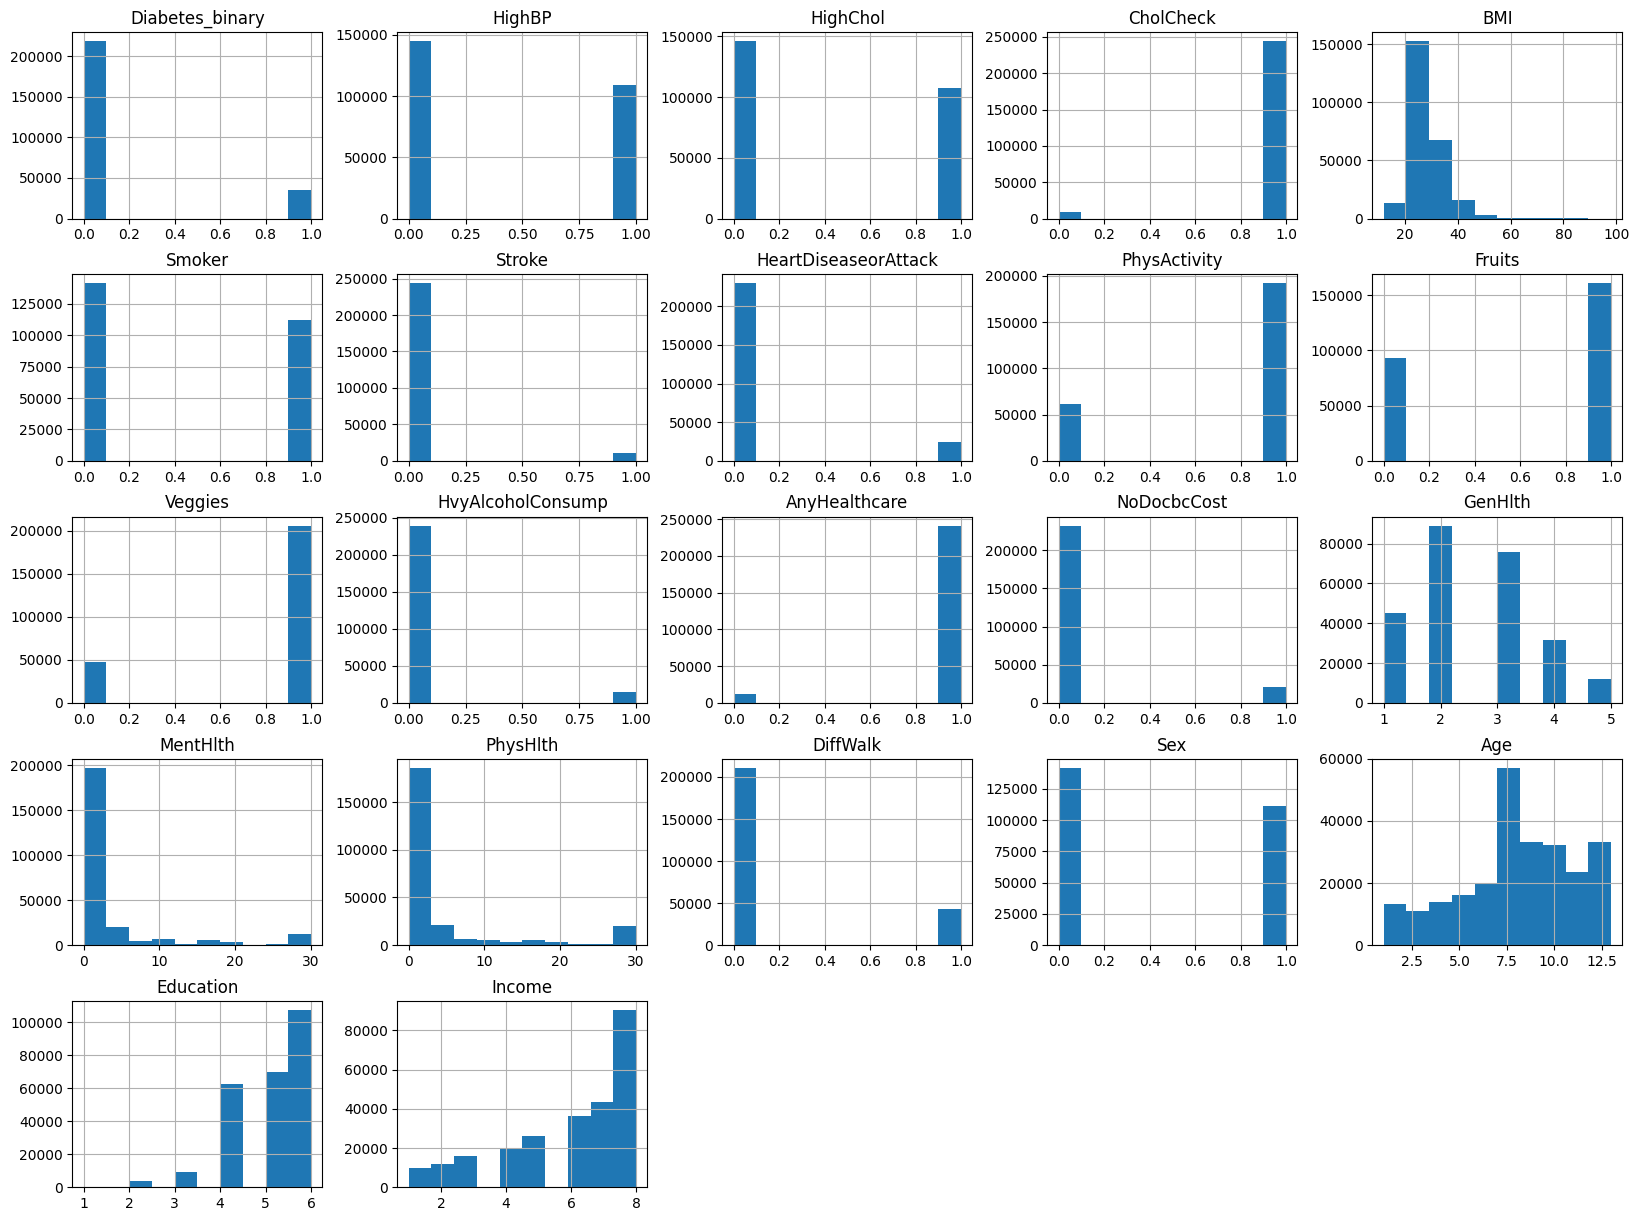

In [ ]:
df.hist(figsize=(20,15));

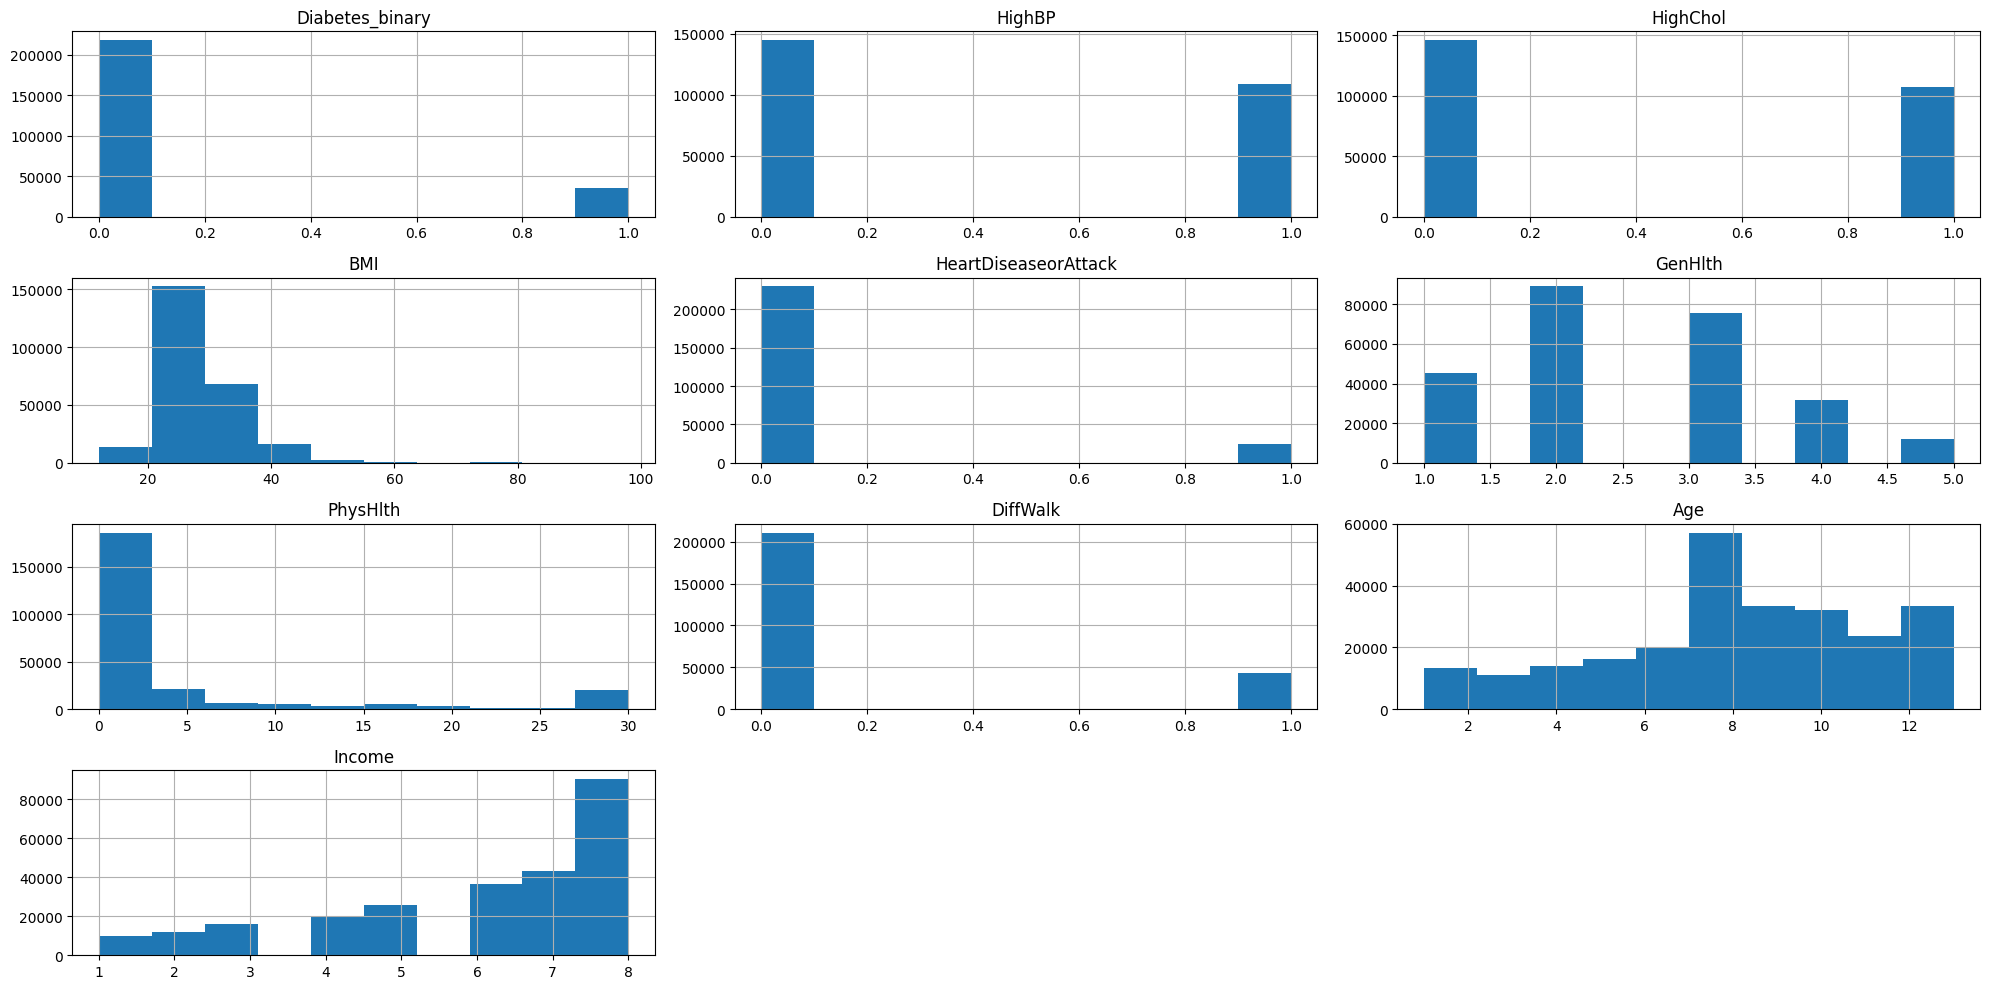

In [ ]:
df[['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income']].hist(figsize=(20,10))
plt.tight_layout()
plt.show()

In [3]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate the target variable and the features
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# select the k best features using chi-square test
selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X, y)

# get the scores and p-values of the features
scores = selector.scores_
pvalues = selector.pvalues_

# print the results
for i in range(len(X.columns)):
    print(f"{X.columns[i]}: score={scores[i]}, p-value={pvalues[i]}")

HighBP: score=10029.013935294373, p-value=0.0
HighChol: score=5859.710582125906, p-value=0.0
CholCheck: score=39.71682518222365, p-value=2.9358536650921693e-10
BMI: score=18355.166400149992, p-value=0.0
Smoker: score=521.9788582374138, p-value=1.5704229591329801e-115
Stroke: score=2725.2251939335906, p-value=0.0
HeartDiseaseorAttack: score=7221.975377867729, p-value=0.0
PhysActivity: score=861.8875318902526, p-value=1.8932709335191465e-189
Fruits: score=154.29140425603717, p-value=2.000073264687282e-35
Veggies: score=153.16921513487, p-value=3.517963396909613e-35
HvyAlcoholConsump: score=779.4248072046532, p-value=1.6052811755739895e-171
AnyHealthcare: score=3.2809384670772808, p-value=0.0700888408126712
NoDocbcCost: score=229.54241214425176, p-value=7.501278468966798e-52
GenHlth: score=9938.507775935022, p-value=0.0
MentHlth: score=21029.632227907496, p-value=0.0
PhysHlth: score=133424.40653362448, p-value=0.0
DiffWalk: score=10059.506390615856, p-value=0.0
Sex: score=140.248274168195

In [9]:
# Import required libraries
from sklearn.feature_selection import SelectKBest, chi2

# Select top 10 features using chi-square test
top_15_features = SelectKBest(chi2, k=15).fit(X, y)

# Print top 10 features based on chi-square score
feature_scores = pd.DataFrame({'feature': X.columns, 'score': top_15_features.scores_})
top_15 = feature_scores.nlargest(15, 'score')
print(top_15)

                 feature          score
15              PhysHlth  133424.406534
14              MentHlth   21029.632228
3                    BMI   18355.166400
16              DiffWalk   10059.506391
0                 HighBP   10029.013935
13               GenHlth    9938.507776
18                   Age    9276.141199
6   HeartDiseaseorAttack    7221.975378
1               HighChol    5859.710582
20                Income    4829.816361
5                 Stroke    2725.225194
7           PhysActivity     861.887532
10     HvyAlcoholConsump     779.424807
19             Education     756.035496
4                 Smoker     521.978858
